In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Objectives :
**Your main task is to cluster on the Global Reactive power parameter and present recommendations to ‘Power Smart’.**  

The following approach is suggested:
1. Start off with the necessary data inspection and EDA tasks suitable for this dataset and carry out data cleaning operations.
2. Since the number of tuples/rows are high resample the data to an ‘Hourly sum’
3. Review the dataset and drop fields that are not relevant.<br>
4. Normalize/scale the data using operations such as Standard scalers etc.<br>
5. Determine the number of clusters using appropriate methods.<br>
6. Perform KMeans clustering.<br>
7. Perform visualizations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes.<br>
8. Identify outliers in the Global Reactive Power parameter.<br>
9. Review clusters in the outliers of the Global Reactive Power parameter.<br>
10. The outliers and the chosen cluster within the Outliers are the areas to focus upon.<br>
11. If you need to recommend any other approach, you are free to do so but provide the rationale for your approach.

## **Step 1: Data Loading, Inspection and EDA**

### **Loading the dataset**

Setting up the appropriate directory and loading the dataset from Microsoft One-Drive

***Importing the file from One Drive***

In [ ]:
import requests
import pandas as pd
import os

URL = 'https://powergrid1989-my.sharepoint.com/:t:/g/personal/60003871_powergrid_in/EQcvX4UuycBPvljnooOIP7gB2Q-qcc7Kh3XiKj6AgmuJXw?e=jL5ogN&download=1'

output_file_o = "hpc.txt"

# Send an HTTP GET request to the OneDrive link to download the file
response = requests.get(URL)

# Save the file content to a temporary file in runtime
if response.status_code == 200:
    # Save the content to a local CSV file
    with open(output_file_o, "wb") as f:
        f.write(response.content)
else:
    print('Failed to download the file. Status code:', response.status_code)


# Check if the file exists
if os.path.exists(output_file_o):
    # Check the file size in bytes
    file_size = os.path.getsize(output_file_o)

    # Define a minimum acceptable file size (adjust as needed)
    min_file_size = 500000  # For example, 50 MB

    if file_size > min_file_size:
        print("\nFile downloaded successfully to Current Working Directory.")
    else:
        print(f"File size is too small ({file_size} bytes). Download may have been unsuccessful.")
else:
    print("File does not exist. Download may have been unsuccessful.")


### **Reading the CSV File in Pandas DF**

In [3]:
import pandas as pd

file = "hpc.txt"

hpc_df = pd.read_csv(file, sep=';', header=0, low_memory=False, infer_datetime_format=True,
                             parse_dates={'datetime': [0, 1]}, index_col=['datetime'], dtype='float64', na_values=['?'])

print(" File Loaded Succesfully in hpc_df : ")
hpc_df.head()


 File Loaded Succesfully in hpc_df : 


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Converting Minute averaged Active/Reactive Power to Watt-Hour and VAR-Hour respectively

hpc_df['Global_active_power'] = (hpc_df['Global_active_power'] * 1000 / 60).round(2)
hpc_df['Global_reactive_power'] = (hpc_df['Global_reactive_power'] * 1000 / 60).round(2)
hpc_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,70.27,6.97,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,89.33,7.27,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,89.57,8.30,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,89.80,8.37,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,61.10,8.80,235.68,15.8,0.0,1.0,17.0


In [5]:
num_rows, num_columns = hpc_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2075259
Number of columns: 7


### **Inspection & Data Cleaning**

In [6]:
# Check percentage of missing values in each column
missing_percentage = (hpc_df.isnull().mean() * 100).round(2)

# Check for duplicate rows
duplicate_percentage = (hpc_df.duplicated().mean() * 100).round(2)

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

print("\nPercentage of Duplicate Rows in the DataFrame: {0} %".format(duplicate_percentage))


Percentage of Missing Values in Each Column:
Global_active_power      1.25
Global_reactive_power    1.25
Voltage                  1.25
Global_intensity         1.25
Sub_metering_1           1.25
Sub_metering_2           1.25
Sub_metering_3           1.25
dtype: float64

Percentage of Duplicate Rows in the DataFrame: 8.12 %


In [7]:
print('Percentage of Datetime items duplicated : ', hpc_df.index.duplicated().mean()*100)

Percentage of Datetime items duplicated :  0.0


🚩 **----> It seems that nearly 1.25% of values in all the columns are missing and no rows are duplicated**

In [8]:
# Here we try to impute the NA values with median
hpc_df = hpc_df.fillna(hpc_df.median())

missing_percentage = (hpc_df.isnull().mean() * 100).round(2)

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64


### **Verify loaded data in dataframe**
 Getting the number of rows and columns after Data Cleaning

In [9]:
num_rows, num_columns = hpc_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2075259
Number of columns: 7


In [ ]:
hpc_df.head()

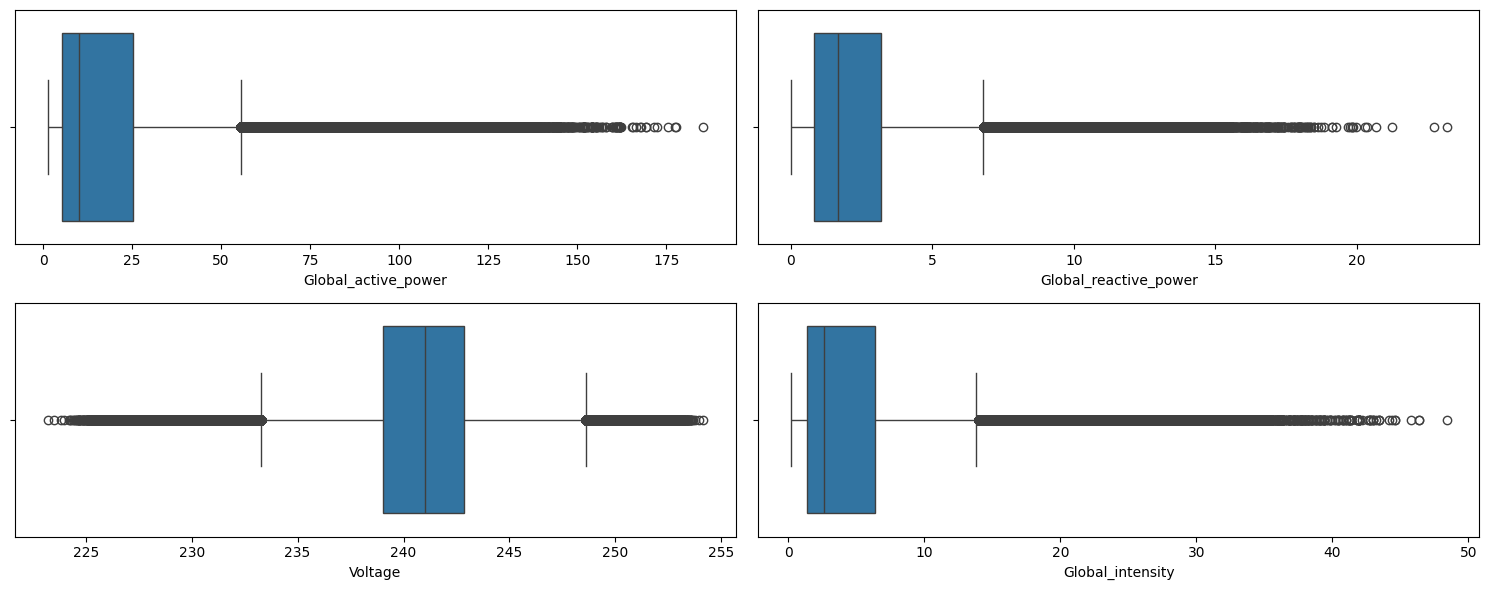

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize = (15,6))

plt1 = sns.boxplot(x = hpc_df['Global_active_power'], ax = axs[0,0], orient = 'horizontal')
plt2 = sns.boxplot(x = hpc_df['Global_reactive_power'], ax = axs[0,1], orient = 'horizontal')
plt3 = sns.boxplot(x = hpc_df['Voltage'], ax = axs[1,0], orient = 'horizontal')
plt4 = sns.boxplot(x = hpc_df['Global_intensity'], ax = axs[1,1], orient = 'horizontal')
plt.tight_layout()


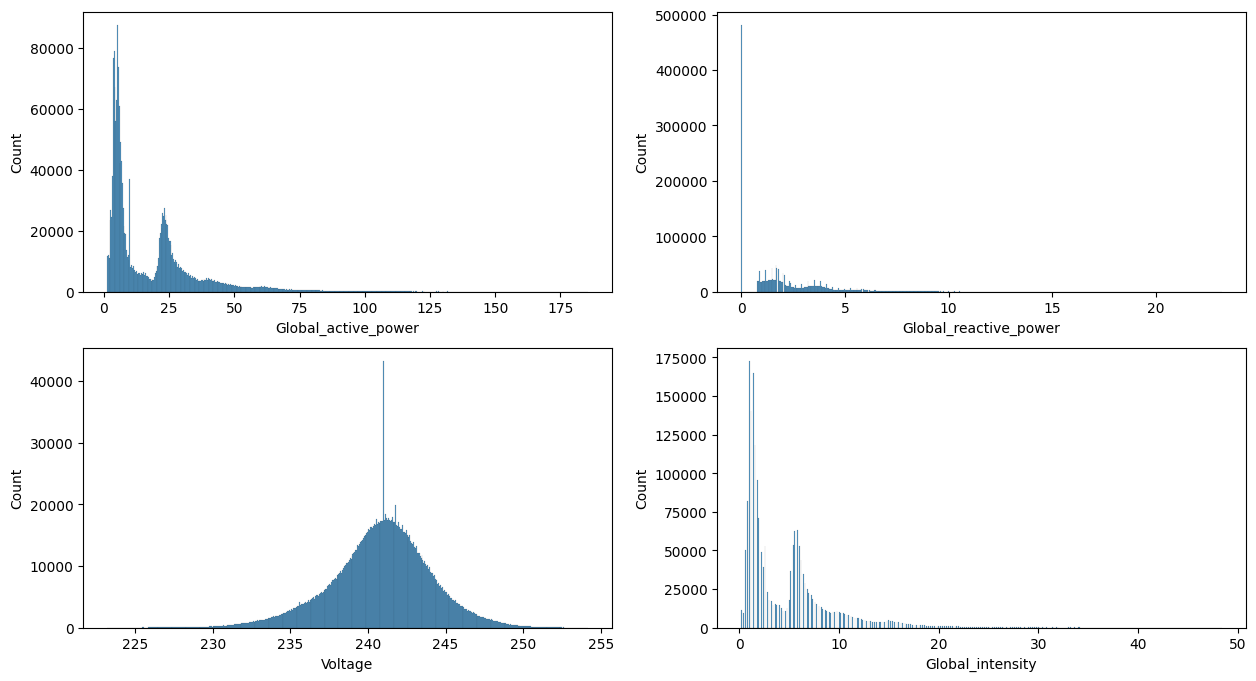

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

plt1 = sns.histplot(hpc_df['Global_active_power'], ax=axs[0, 0])
plt2 = sns.histplot(hpc_df['Global_reactive_power'], ax=axs[0, 1])
plt3 = sns.histplot(hpc_df['Voltage'], ax=axs[1, 0])
plt4 = sns.histplot(hpc_df['Global_intensity'], ax=axs[1, 1])

plt.show()


## **Step 2: Resampling data to Hourly-Sum**

In [12]:
# Resample Power data to Hourly sum
hpc_df_hr = hpc_df.resample('H').sum()

# For Voltage taking Hourly mean
hpc_df_hr['Voltage'] = hpc_df['Voltage'].resample('H').mean().round(2)
hpc_df_hr.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,2533.72,137.41,234.64,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,3632.16,80.05,234.58,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,3400.26,85.25,233.23,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,3268.56,75.08,234.07,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,3056.49,76.68,237.16,782.8,0.0,25.0,1033.0


In [13]:
hpc_df_hr.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1085.440772,123.416485,240.841888,276.131718,66.470121,76.932869,383.392003
std,893.475879,66.447363,2.981729,224.416722,211.089850,250.148948,439.713633
min,46.730000,0.000000,225.830000,11.400000,0.000000,0.000000,0.000000
25%,343.610000,78.340000,239.210000,91.200000,0.000000,0.000000,39.000000
50%,783.250000,106.100000,241.010000,200.400000,0.000000,19.000000,99.000000
75%,1570.130000,148.690000,242.670000,393.800000,0.000000,39.000000,837.000000
max,6560.570000,774.340000,251.900000,1703.000000,2902.000000,2786.000000,1293.000000


<Axes: xlabel='Global_reactive_power'>

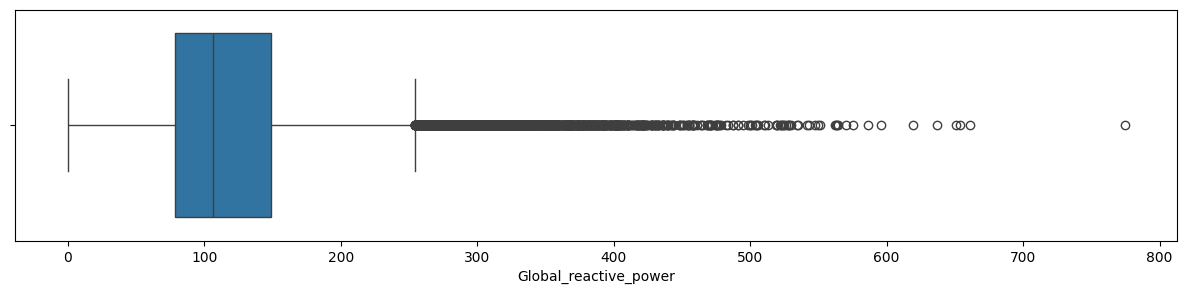

In [14]:
plt.figure(figsize=(15,3))
sns.boxplot(x=hpc_df_hr['Global_reactive_power'], orient = 'horizontal')

## **Step-3: Rescaling the hourly-sum data**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hpc_df_hr_sc = pd.DataFrame(scaler.fit_transform(hpc_df_hr), columns=hpc_df_hr.columns, index=hpc_df_hr.index)
hpc_df_hr_sc.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,1.620973,0.210599,-2.079994,1.673109,-0.314895,-0.231597,0.508538
2006-12-16 18:00:00,2.850391,-0.652654,-2.100117,2.940413,-0.314895,1.303511,1.429606
2006-12-16 19:00:00,2.590840,-0.574395,-2.552881,2.647204,-0.314895,0.036247,1.404589
2006-12-16 20:00:00,2.443436,-0.727451,-2.271161,2.490351,-0.314895,-0.307553,1.418234
2006-12-16 21:00:00,2.206078,-0.703371,-1.234834,2.257744,-0.314895,-0.207611,1.477365


In [ ]:
hpc_df_hr_sc.describe()

### Breaking up Time Series and dropping irrelevant Columns

In [16]:
# Function Creating Features for time series analysis
def time_series_features(df):
    df = df.copy()
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['WeekDay'] = df.index.dayofweek
    df['Hour'] = df.index.hour
    df['Year_Quarter'] = df.index.quarter

    return df

In [17]:
hpc_df_ts = time_series_features(hpc_df_hr)
hpc_df_ts

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter
datetime,,,,,,,,,,,,
2006-12-16 17:00:00,2533.72,137.41,234.64,651.6,0.0,19.0,607.0,2006,12,5,17,4
2006-12-16 18:00:00,3632.16,80.05,234.58,936.0,0.0,403.0,1012.0,2006,12,5,18,4
2006-12-16 19:00:00,3400.26,85.25,233.23,870.2,0.0,86.0,1001.0,2006,12,5,19,4
2006-12-16 20:00:00,3268.56,75.08,234.07,835.0,0.0,0.0,1007.0,2006,12,5,20,4
2006-12-16 21:00:00,3056.49,76.68,237.16,782.8,0.0,25.0,1033.0,2006,12,5,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1725.91,61.42,237.07,433.0,0.0,0.0,772.0,2010,11,4,17,4
2010-11-26 18:00:00,1573.42,53.67,237.53,397.2,0.0,0.0,0.0,2010,11,4,18,4
2010-11-26 19:00:00,1659.35,60.03,236.74,423.4,0.0,4.0,0.0,2010,11,4,19,4


## **Step-4: Selecting the relavant fields for Clustering**

In [18]:
# For Clustering, extracting the Reactive power from hpc_df as desired in Objective

hpc_df_VAR = hpc_df_ts[['Global_reactive_power']]
hpc_df_VAR.head()

,Global_reactive_power
datetime,
2006-12-16 17:00:00,137.41
2006-12-16 18:00:00,80.05
2006-12-16 19:00:00,85.25
2006-12-16 20:00:00,75.08
2006-12-16 21:00:00,76.68


In [19]:
hpc_df_VAR.describe()

,Global_reactive_power
count,34589.000000
mean,123.416485
std,66.447363
min,0.000000
25%,78.340000
50%,106.100000
75%,148.690000
max,774.340000


<Axes: xlabel='Global_reactive_power'>

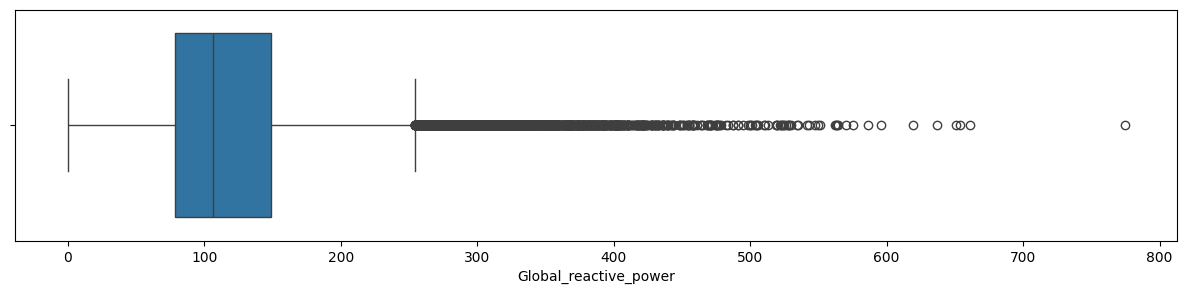

In [20]:
# Data Review
plt.figure(figsize=(15,3))
sns.boxplot(x=hpc_df_VAR['Global_reactive_power'], orient = 'horizontal')

## **Step-5: Determining the optimal number of clusters**

Using Elbow Method

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(hpc_df_VAR)
    sse.append([k, silhouette_score(hpc_df_VAR, kmeans.labels_)])

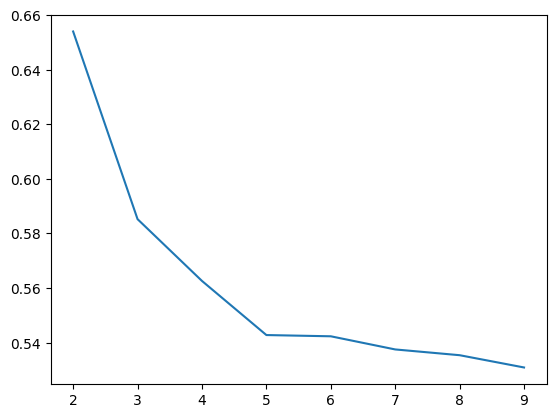

In [22]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])

**----> Based on above plot, since the first elbow is at k=3, taking optimum number of Clusters as '3'**

## **Step-6: Performing K-Means Clustering**

In [23]:
optimal_clusters = 3

kmeans_final = KMeans(n_clusters=optimal_clusters, init = 'k-means++', max_iter = 100, random_state = 42)
kmeans_final.fit_predict(hpc_df_VAR)
kmeans_final.labels_


array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

----> Assigning Clusters in the un-Scaled Hourly-sum Dataframe

In [24]:
hpc_df_ts['Cluster'] = kmeans_final.labels_
hpc_df_ts.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
datetime,,,,,,,,,,,,,
2006-12-16 17:00:00,2533.72,137.41,234.64,651.6,0.0,19.0,607.0,2006,12,5,17,4,0
2006-12-16 18:00:00,3632.16,80.05,234.58,936.0,0.0,403.0,1012.0,2006,12,5,18,4,1
2006-12-16 19:00:00,3400.26,85.25,233.23,870.2,0.0,86.0,1001.0,2006,12,5,19,4,1
2006-12-16 20:00:00,3268.56,75.08,234.07,835.0,0.0,0.0,1007.0,2006,12,5,20,4,1
2006-12-16 21:00:00,3056.49,76.68,237.16,782.8,0.0,25.0,1033.0,2006,12,5,21,4,1


In [25]:
# Cluster with 120.7 to 227.34 VAR-hr consumption
hpc_df_ts[hpc_df_ts['Cluster']==0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
count,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.0
mean,1126.456464,158.364144,240.714038,288.440102,69.328946,114.638371,386.782351,2008.574773,6.606572,3.037541,12.299620,2.542178,0.0
std,910.501443,28.407202,2.695174,227.474500,201.802807,292.985590,431.470909,1.117835,2.981712,2.006770,6.864577,0.978935,0.0
min,158.790000,120.700000,225.830000,44.600000,0.000000,0.000000,0.000000,2006.000000,1.000000,0.000000,0.000000,1.000000,0.0
25%,364.010000,134.590000,239.270000,99.200000,0.000000,24.000000,45.000000,2008.000000,4.000000,1.000000,7.000000,2.000000,0.0
50%,824.670000,151.770000,240.840000,212.800000,0.000000,38.000000,101.000000,2009.000000,7.000000,3.000000,13.000000,3.000000,0.0
75%,1648.660000,178.500000,242.330000,414.400000,0.000000,60.000000,798.000000,2010.000000,9.000000,5.000000,18.000000,3.000000,0.0
max,6333.660000,227.340000,251.680000,1620.800000,2879.000000,2786.000000,1293.000000,2010.000000,12.000000,6.000000,23.000000,4.000000,0.0


In [26]:
# Cluster with 0 to 120.69 VAR consumption
hpc_df_ts[hpc_df_ts['Cluster']==1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
count,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.000000,20734.0
mean,948.248375,83.185428,241.073435,239.443002,36.297482,35.441594,360.687084,2008.351452,6.340166,2.886515,10.576734,2.449889,1.0
std,765.018109,21.124690,3.098686,190.901142,134.762668,158.833161,439.315154,1.126837,3.656934,1.974027,6.908276,1.184911,0.0
min,46.730000,0.000000,226.270000,11.400000,0.000000,0.000000,0.000000,2006.000000,1.000000,0.000000,0.000000,1.000000,1.0
25%,318.300000,66.582500,239.360000,82.800000,0.000000,0.000000,0.000000,2007.000000,3.000000,1.000000,5.000000,1.000000,1.0
50%,630.640000,83.810000,241.140000,160.400000,0.000000,4.000000,90.000000,2008.000000,6.000000,3.000000,10.000000,2.000000,1.0
75%,1426.505000,100.200000,243.010000,353.800000,0.000000,23.000000,786.000000,2009.000000,10.000000,5.000000,16.000000,4.000000,1.0
max,6363.860000,120.690000,251.900000,1662.200000,1781.000000,2483.000000,1236.000000,2010.000000,12.000000,6.000000,23.000000,4.000000,1.0


In [27]:
# Cluster with 227.47 to 774.34 VAR-hr consumption
hpc_df_ts[hpc_df_ts['Cluster']==2].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.00000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.0
mean,2024.749578,296.466330,239.518489,521.341121,300.58011,247.973165,554.024073,2008.516180,6.656669,3.746646,15.496843,2.558800,2.0
std,1166.727579,66.073555,2.843029,293.794035,464.20297,463.273830,441.657696,1.126229,3.143954,2.015274,5.225113,1.022977,0.0
min,261.110000,227.470000,228.510000,81.600000,0.00000,0.000000,0.000000,2006.000000,1.000000,0.000000,0.000000,1.000000,2.0
25%,1073.065000,246.815000,237.952500,284.100000,0.00000,24.000000,100.000000,2008.000000,4.000000,2.000000,12.000000,2.000000,2.0
50%,1873.665000,276.300000,239.790000,477.700000,0.00000,53.000000,516.000000,2009.000000,7.000000,4.000000,17.000000,3.000000,2.0
75%,2786.382500,326.830000,241.380000,713.600000,510.75000,105.000000,1037.000000,2009.000000,9.000000,5.000000,19.000000,3.000000,2.0
max,6560.570000,774.340000,250.460000,1703.000000,2902.00000,2443.000000,1272.000000,2010.000000,12.000000,6.000000,23.000000,4.000000,2.0


Text(0.5, 1.0, 'Cluster Distribution based on Reactive Power')

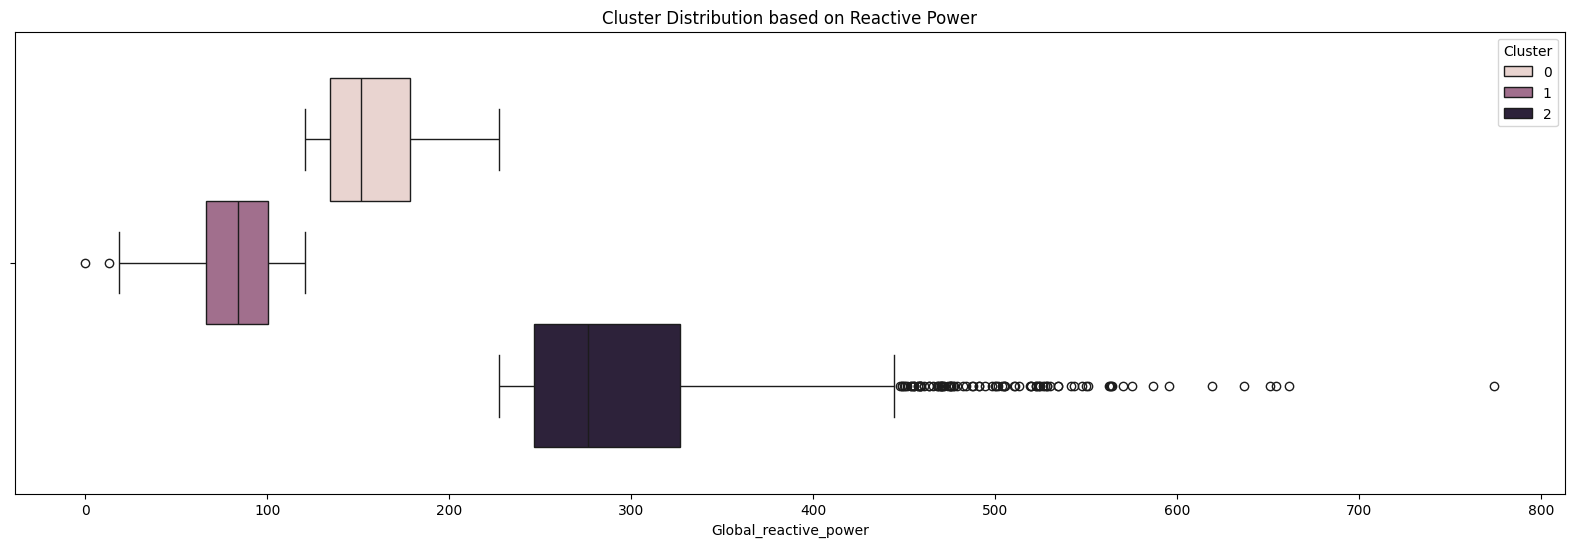

In [28]:
plt.figure(figsize=(20,6))
sns.boxplot(data = hpc_df_ts, x = hpc_df_ts['Global_reactive_power'], hue = 'Cluster', orient ='horizontal')
plt.title('Cluster Distribution based on Reactive Power')

Cluster-2 Contains outliers for Global_Reactive_Power Data

## **Step-7: Aanlysis and Suggestions**

In [ ]:
hpc_df_ts.columns

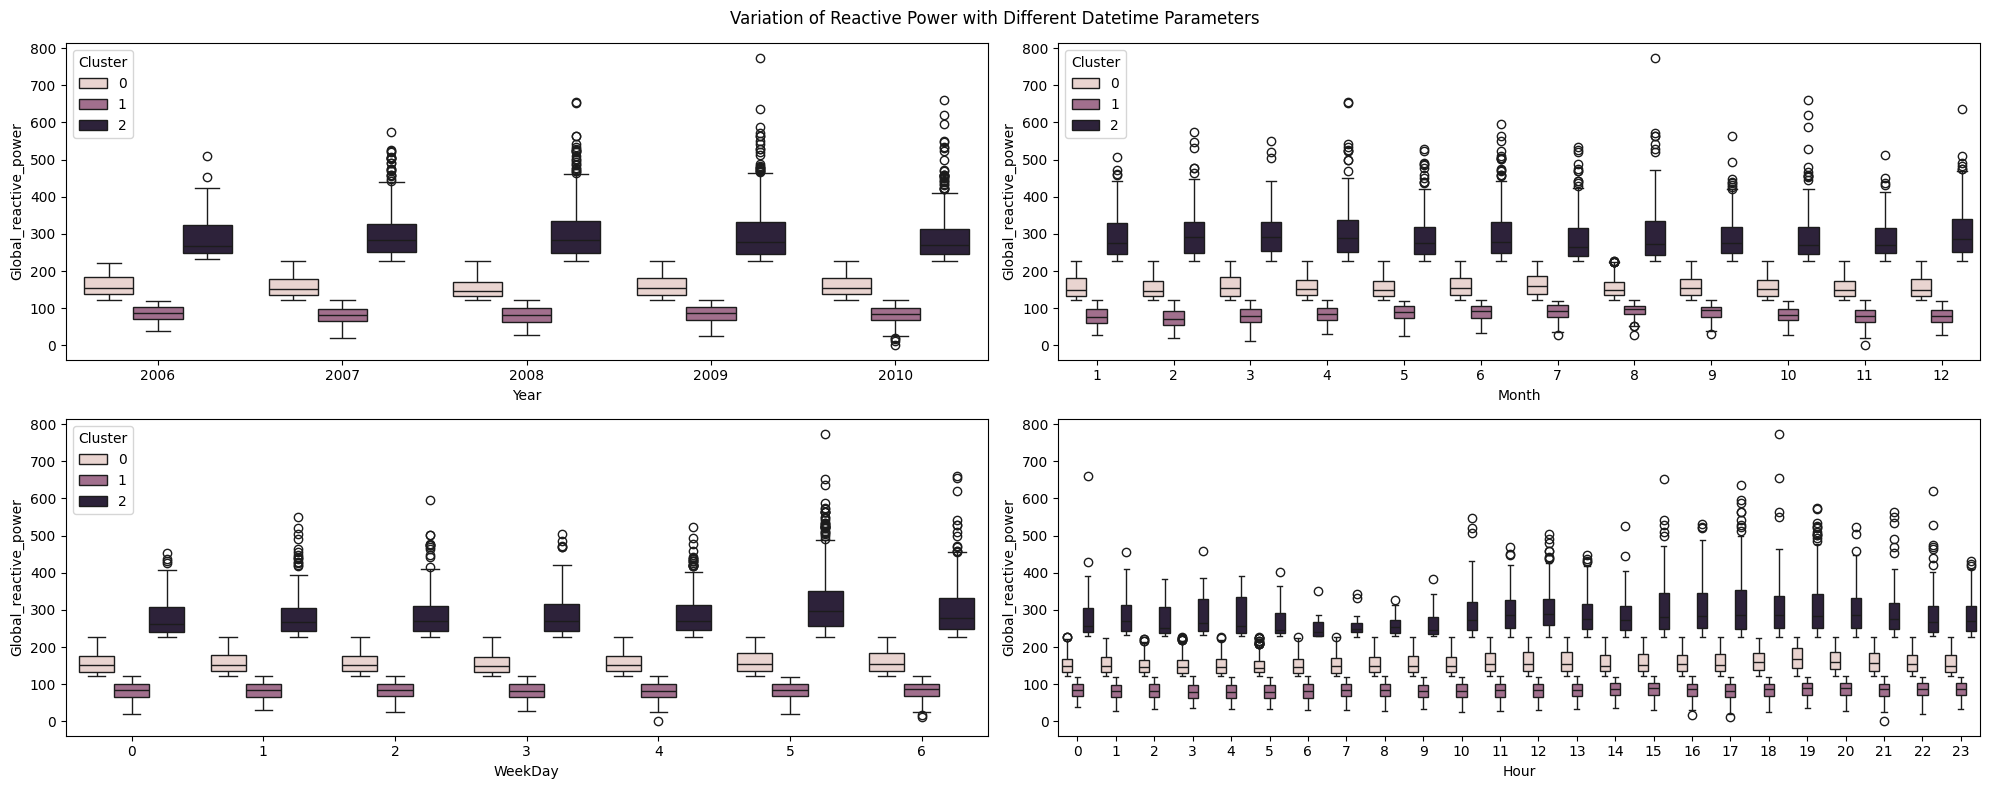

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

plt1 = sns.boxplot(data = hpc_df_ts, x = hpc_df_ts['Year'], y = hpc_df_ts['Global_reactive_power'] , ax=axs[0, 0], hue = 'Cluster')
plt2 = sns.boxplot(data = hpc_df_ts, x = hpc_df_ts['Month'], y = hpc_df_ts['Global_reactive_power'] , ax=axs[0, 1], hue = 'Cluster')
plt3 = sns.boxplot(data = hpc_df_ts, x = hpc_df_ts['WeekDay'], y = hpc_df_ts['Global_reactive_power'] , ax=axs[1, 0], hue = 'Cluster')
plt4 = sns.boxplot(data = hpc_df_ts, x = hpc_df_ts['Hour'], y = hpc_df_ts['Global_reactive_power'] , ax=axs[1, 1], hue = 'Cluster', legend = None)
plt.suptitle("Variation of Reactive Power with Different Datetime Parameters")
plt.tight_layout()

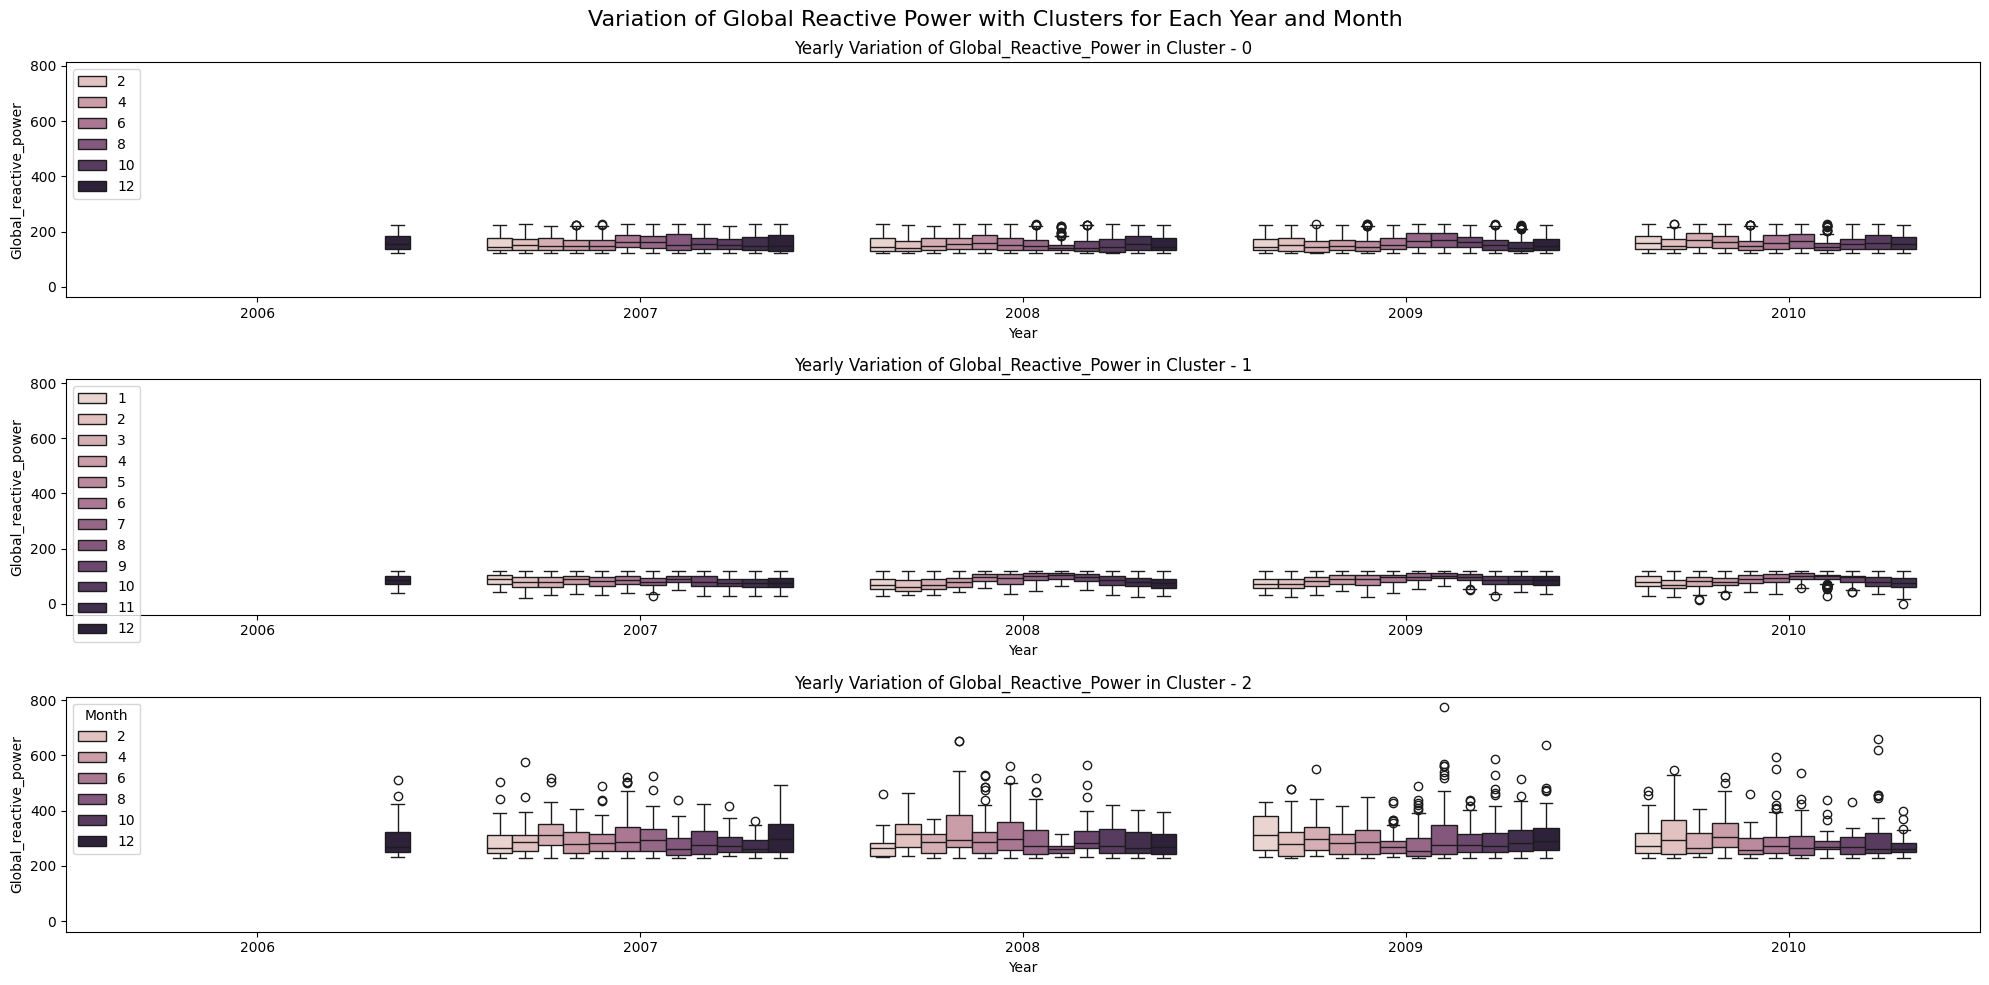

In [135]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharey=True)

plt1 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==0], x = 'Year', y = 'Global_reactive_power', hue='Month', ax=axs[0])
plt2 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==1], x = 'Year', y = 'Global_reactive_power', hue='Month', legend='full', ax=axs[1])
plt3 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==2], x = 'Year', y = 'Global_reactive_power', hue='Month', ax=axs[2])

plt1.set_title('Yearly Variation of Global_Reactive_Power in Cluster - 0')
plt2.set_title('Yearly Variation of Global_Reactive_Power in Cluster - 1')
plt3.set_title('Yearly Variation of Global_Reactive_Power in Cluster - 2')

plt.tight_layout()

fig.suptitle('Variation of Global Reactive Power with Clusters for Each Year and Month', fontsize=16)

plt.tight_layout()
plt1.legend(loc='upper left')
plt2.legend(loc='upper left')
plt2.legend(loc='upper left')


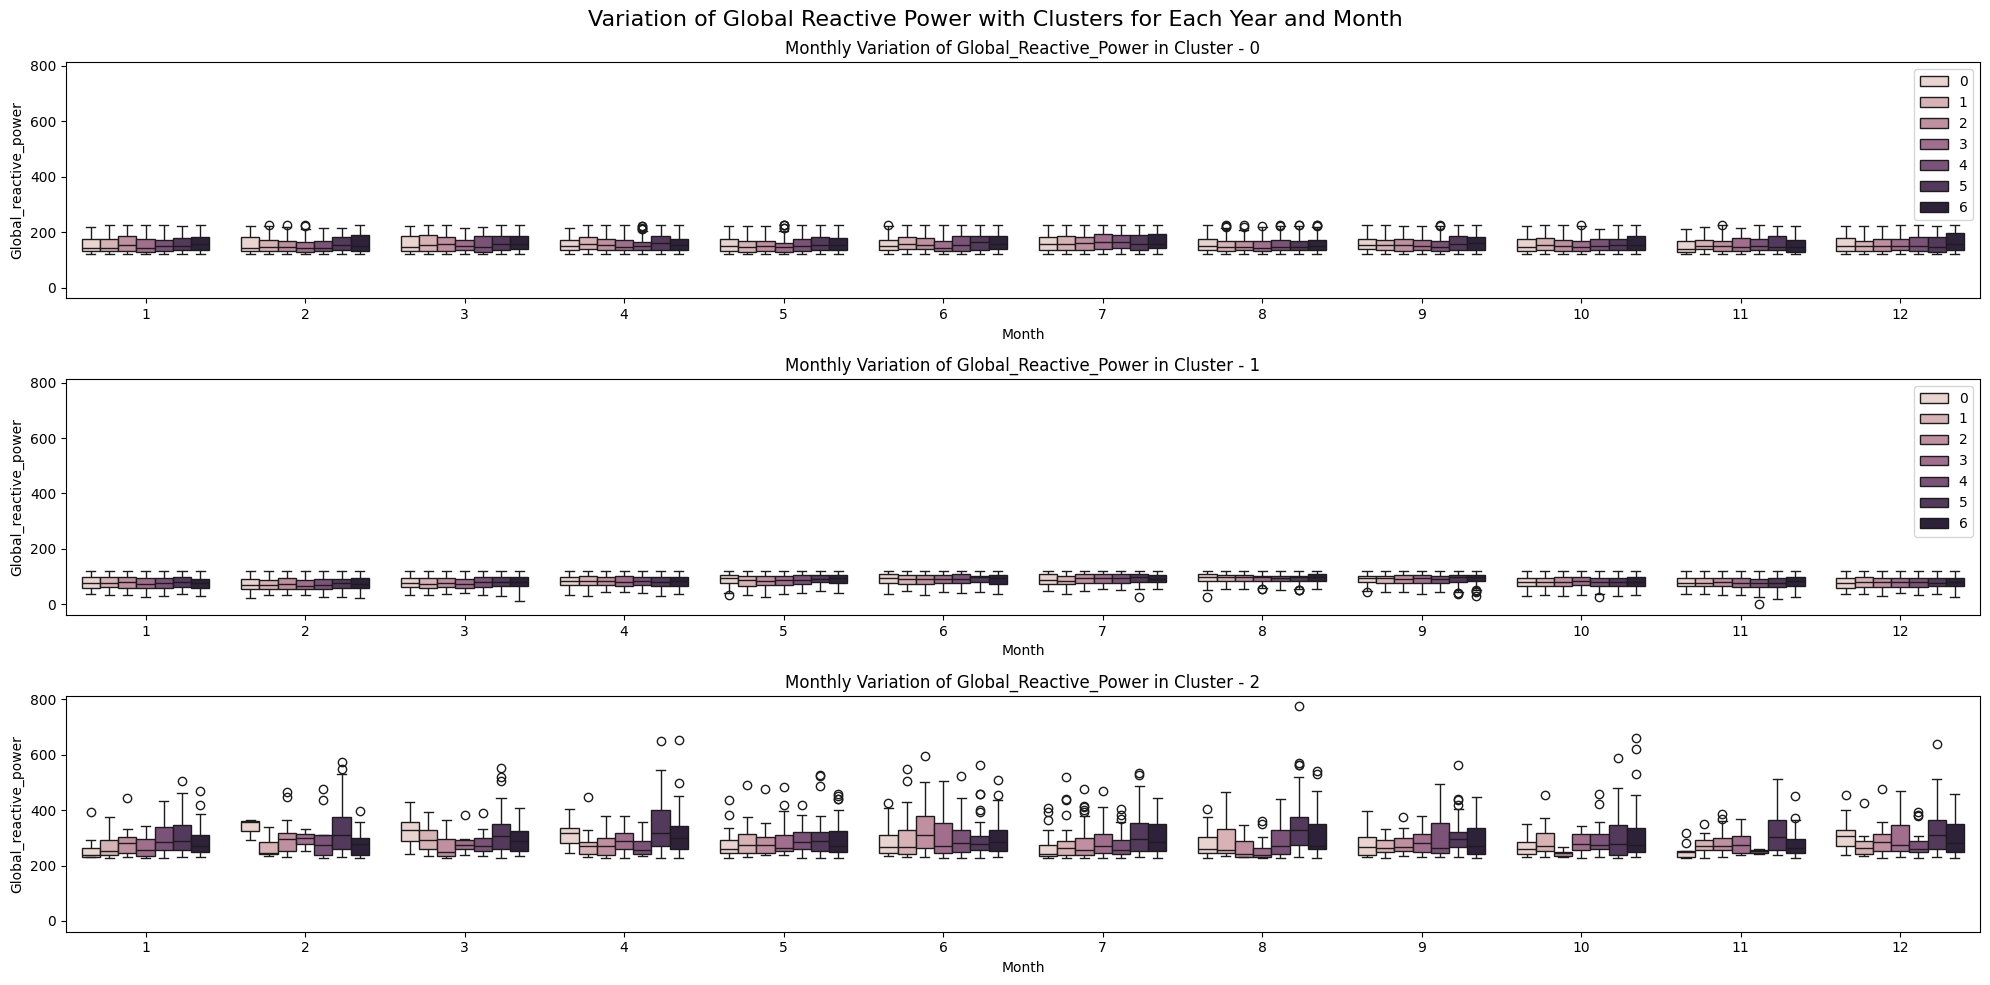

In [133]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharey=True)

plt1 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==0], x = 'Month', y = 'Global_reactive_power', hue='WeekDay', legend='full', ax = axs[0])
plt2 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==1], x = 'Month', y = 'Global_reactive_power', hue='WeekDay', legend='full', ax = axs[1])
plt3 = sns.boxplot(data = hpc_df_ts[hpc_df_ts['Cluster']==2], x = 'Month', y = 'Global_reactive_power', hue='WeekDay', legend=None, ax = axs[2])

plt1.set_title('Monthly Variation of Global_Reactive_Power in Cluster - 0')
plt2.set_title('Monthly Variation of Global_Reactive_Power in Cluster - 1')
plt3.set_title('Monthly Variation of Global_Reactive_Power in Cluster - 2')


fig.suptitle('Variation of Global Reactive Power with Clusters for Each Month and Weekday', fontsize=16)

plt.tight_layout()
plt1.legend(loc='best')
plt2.legend(loc='best')



Reactive Power consumption increases during May-August Period which signifies the summer period and therby increased use of Air Conditioning Equipments

However, in every month, there is increased Reactive power consumption during weekends. This is likely because people are more likely to be at home during the weekends, and they use more appliances and electronics during those times.

<Axes: xlabel='Global_reactive_power', ylabel='Voltage'>

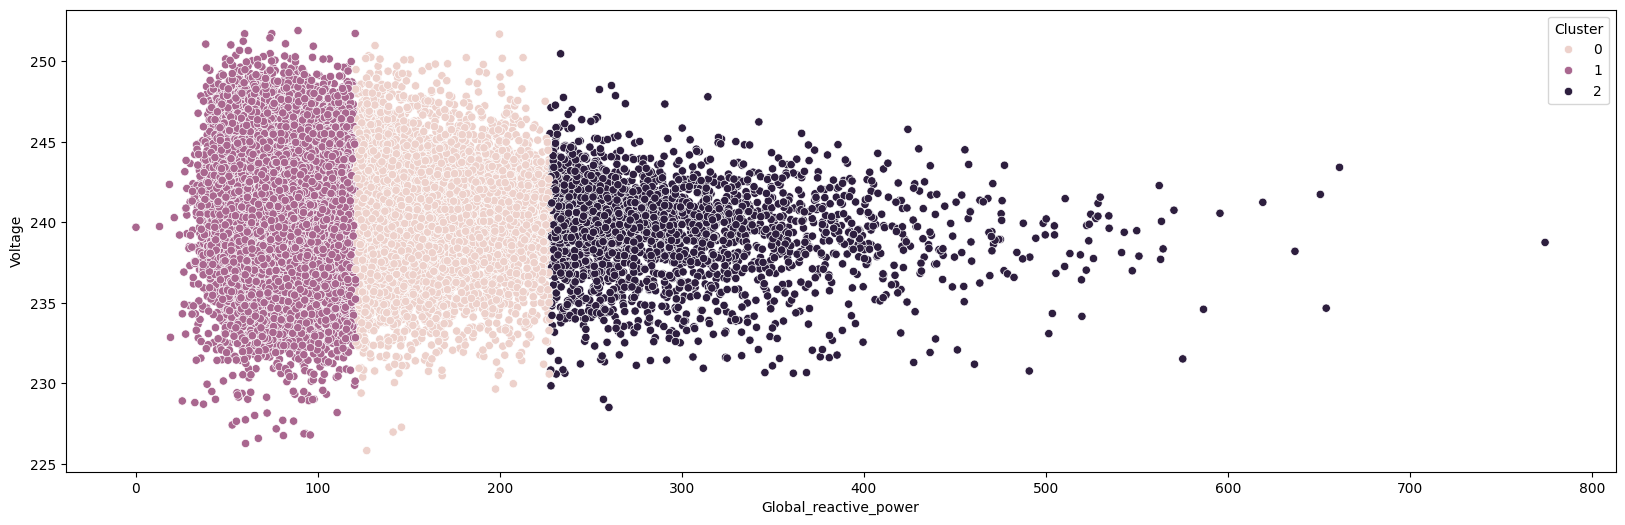

In [127]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = hpc_df_ts, y = hpc_df_ts['Voltage'], x = hpc_df_ts['Global_reactive_power'] , hue='Cluster')

Reactive power consumption seems to be normally distributed alongwith the variation in Voltage with a mean at 240V approx.

<Axes: xlabel='Global_reactive_power', ylabel='Global_intensity'>

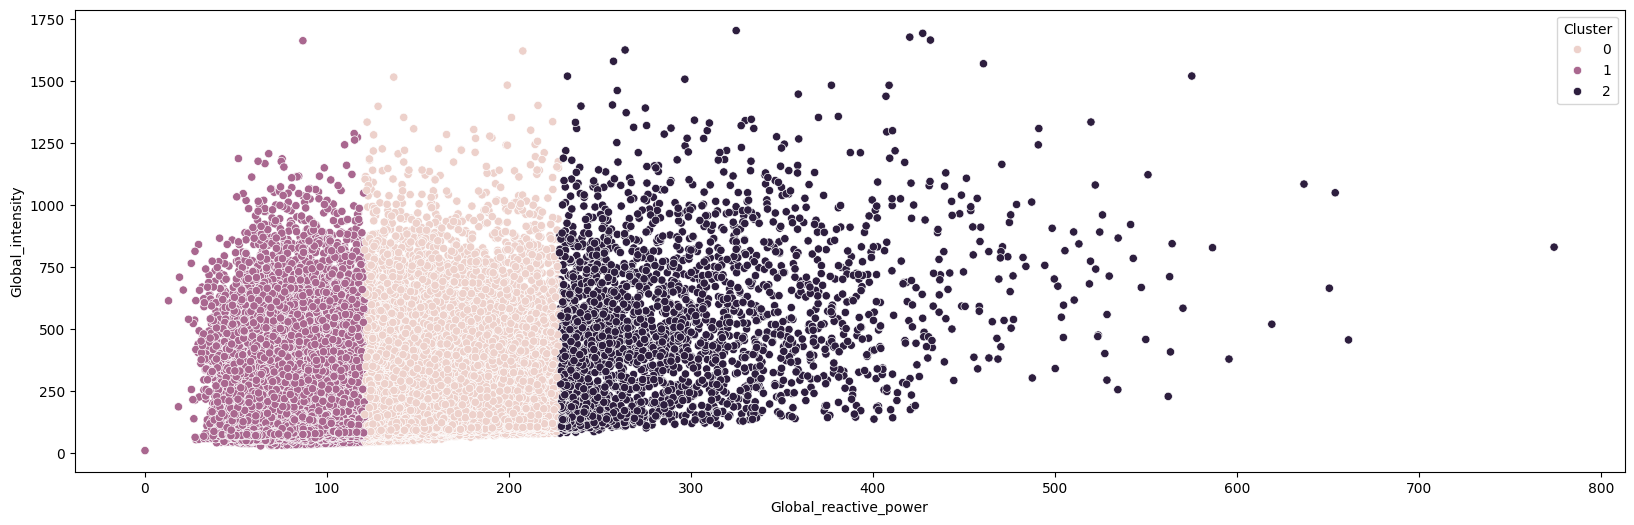

In [43]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = hpc_df_ts, y = hpc_df_ts['Global_intensity'], x = hpc_df_ts['Global_reactive_power'] , hue='Cluster')

### **Box Plots for Global Active & Reactive Power**

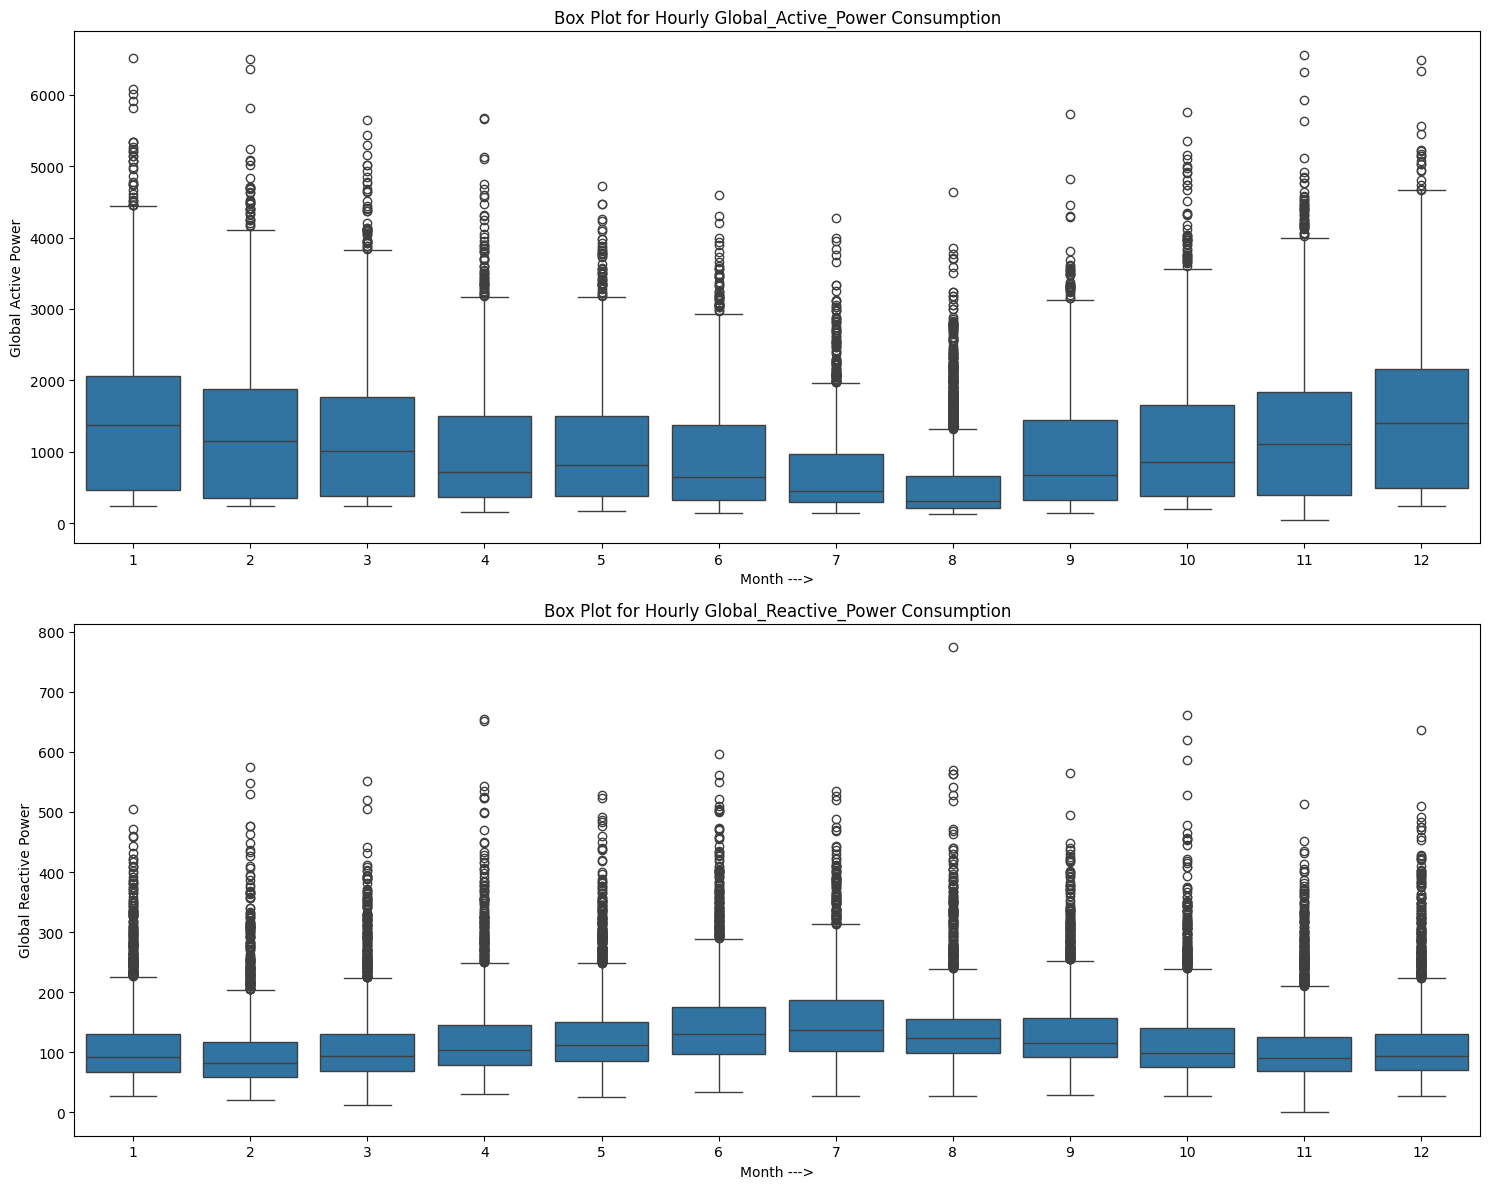

In [85]:
# Plotting Box Plots for Global Active & Reactive Power

import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Box plot for Global_active_power
sns.boxplot(data=hpc_df_ts, y='Global_active_power', x='Month', ax=axes[0])
axes[0].set_title('Box Plot for Hourly Global_Active_Power Consumption')
axes[0].set_xlabel('Month --->')
axes[0].set_ylabel('Global Active Power')

# Box plot for Global_reactive_power
sns.boxplot(data=hpc_df_ts, y='Global_reactive_power', x='Month', ax=axes[1])
axes[1].set_title('Box Plot for Hourly Global_Reactive_Power Consumption')
axes[1].set_xlabel('Month --->')
axes[1].set_ylabel('Global Reactive Power')

# Adjust the layout
plt.tight_layout()
plt.show()


### 🚩 *`Every year during the months of June-July-August, the Active-Power Consumption reduces and Reactive Power Consumption plot has spikes indicating that during this period the use of heating elements has been subsequently reduced however, use of Air-Conditioners and other inductive loads has been increased.`*

### 🚩 *`During the months viz. Nov, Dec, Jan, Feb high values of median for Global_Active_Power and low values of Global_Reactive_Power indicates increased usage of heating elements during the winter. `*

### 🚩 *`Since the dataset provided pertains to a household nearby Paris and in that region the month of Feb corresponds to winter and the month of May corresponds to transition from spring to summer. So, high values of median in Dec, Jan, Feb may signify increased usage of electric water heater however, for high variations in May readings signify change in usage patters of Air Conditioner. `*

### **Line plot of Hourly reactive power data**

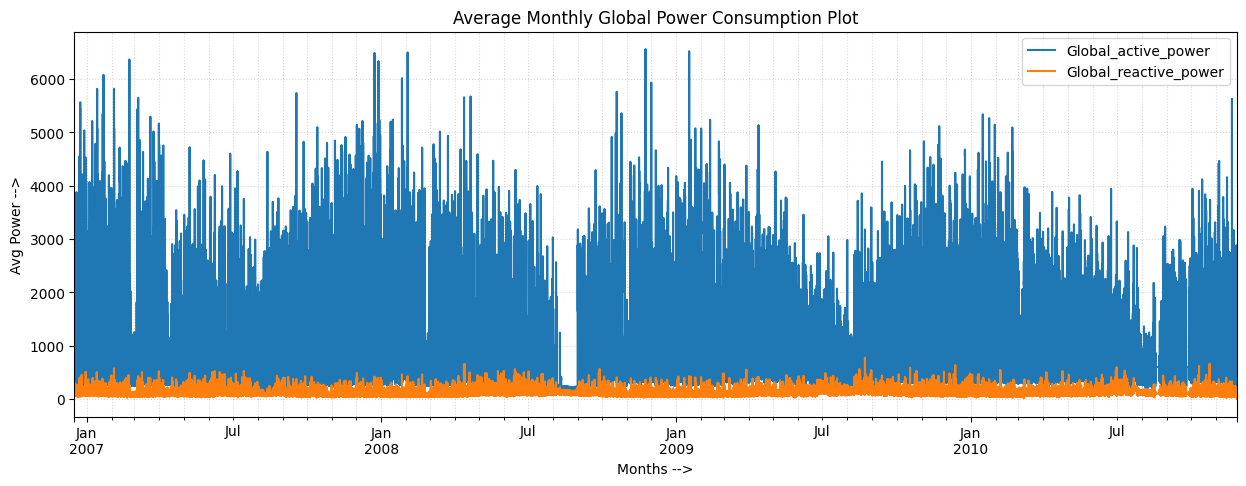

In [87]:
hpc_df_ts[['Global_active_power', 'Global_reactive_power']].plot(kind='line',figsize=(15,5))
plt.xlabel('Months -->')
plt.ylabel('Avg Power -->')
plt.title('Average Monthly Global Power Consumption Plot')

plt.grid(which='both', linestyle=':', alpha=0.5)
plt.show()

###  *`Every year during the months of June-July-August, the Active-Power Consumption reduces and Reactive Power Consumption plot has spikes indicating that during this period the use of heating elements has been subsequently reduced however, use of Air-Conditioners and other inductive loads has been increased.`*

### **Correlation analysis and heatmap**

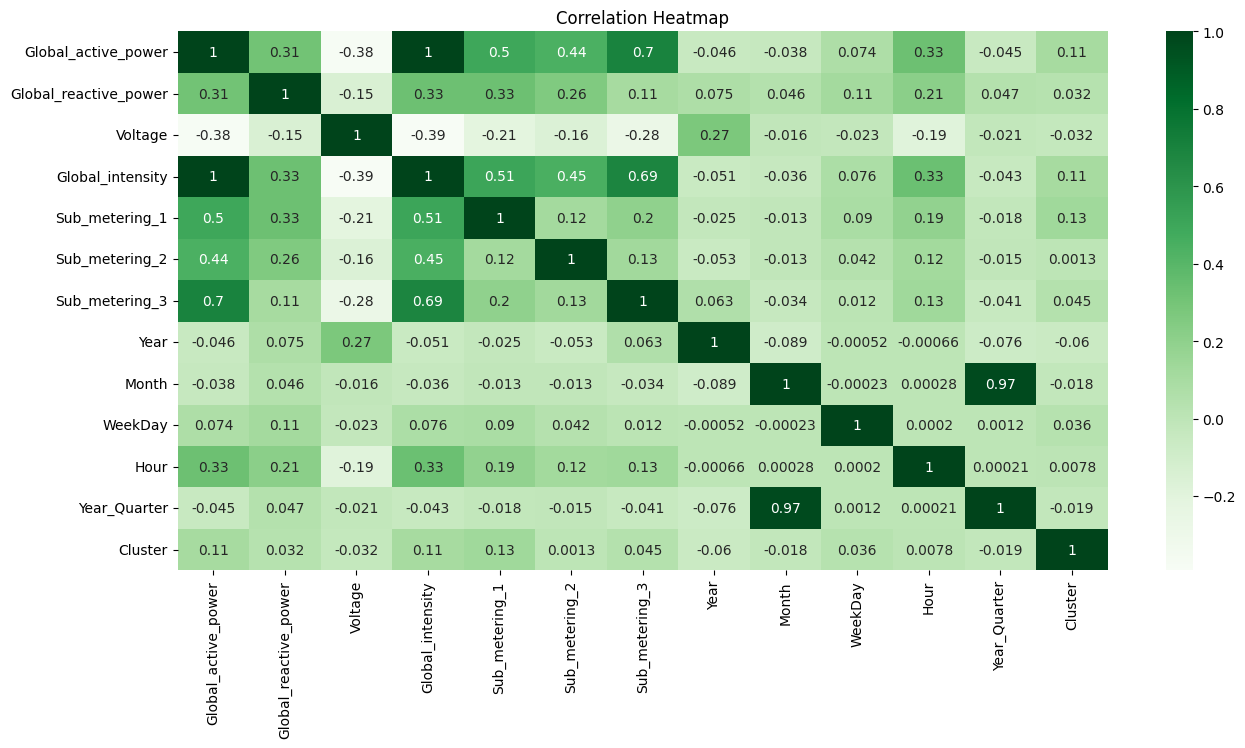

In [90]:
import seaborn as sns

correlation_matrix = hpc_df_ts.corr()
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')

plt.show()


### 🚩*`Based on the analysis of the data, the following are some targeted interventions that could be used to reduce reactive power consumption :`*
 - Install smart thermostats that can learn and adjust the temperature settings based on the user's preferences. This can help to reduce the amount of energy that is used for heating and cooling, which can in turn reduce the amount of reactive power that is consumed.

 - Provide incentives to customers who install energy-efficient appliances and electronics. This can help to reduce the amount of energy that is consumed, which can in turn reduce the amount of reactive power that is consumed.
 
 - Implement time-of-use pricing, which charges customers different rates for electricity depending on the time of day. This can help to encourage customers to use energy during off-peak hours, which can help to reduce the amount of reactive power that is consumed.`*

In [162]:
#Cleaning the outliers

q1 = hpc_df_ts['Global_reactive_power'].quantile(0.05)
q3 = hpc_df_ts['Global_reactive_power'].quantile(0.95)

IQR = q3-q1

# Filter outliers based on IQR
outliers = hpc_df_ts[(hpc_df_ts['Global_reactive_power'] < (q1 - 1.5 * IQR)) | (hpc_df_ts['Global_reactive_power'] > (q3 + 1.5 * IQR))]



In [176]:
outliers

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
datetime,,,,,,,,,,,,,
2007-02-03 19:00:00,5814.70,575.24,231.52,1520.0,1034.0,1368.0,987.0,2007,2,5,19,1,2
2008-04-12 15:00:00,2580.06,650.83,241.73,665.4,539.0,71.0,1115.0,2008,4,5,15,2,2
2008-04-13 18:00:00,4009.88,654.06,234.67,1049.8,566.0,1081.0,712.0,2008,4,6,18,2,2
2008-06-14 18:00:00,710.59,562.30,242.28,229.6,0.0,68.0,168.0,2008,6,5,18,2,2
2008-09-27 21:00:00,3323.30,564.44,238.35,844.6,0.0,23.0,1115.0,2008,9,5,21,3,2
2009-08-15 17:00:00,2761.84,563.08,237.70,711.8,531.0,117.0,1142.0,2009,8,5,17,3,2
2009-08-22 17:00:00,1494.09,563.53,240.06,408.8,480.0,270.0,101.0,2009,8,5,17,3,2
2009-08-22 18:00:00,3177.75,774.34,238.75,830.8,1137.0,72.0,1019.0,2009,8,5,18,3,2
2009-08-22 19:00:00,2157.05,570.40,240.75,584.8,582.0,258.0,441.0,2009,8,5,19,3,2


In [164]:
outliers.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,WeekDay,Hour,Year_Quarter,Cluster
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,2753.052857,612.718571,238.844286,722.614286,464.642857,401.357143,670.214286,2008.785714,7.500000,5.000000,16.785714,2.857143,2.0
std,1343.399297,59.614196,3.349300,340.194085,424.665770,520.500441,441.107553,0.892582,2.794225,0.960769,5.146748,0.949262,0.0
min,710.590000,562.300000,231.520000,229.600000,0.000000,23.000000,101.000000,2007.000000,2.000000,2.000000,0.000000,1.000000,2.0
25%,1785.790000,565.930000,237.825000,473.000000,0.000000,69.500000,168.000000,2008.000000,6.000000,5.000000,17.000000,2.000000,2.0
50%,2670.950000,591.165000,239.405000,688.600000,514.500000,153.000000,849.500000,2009.000000,8.000000,5.000000,17.500000,3.000000,2.0
75%,3286.912500,647.347500,241.117500,841.150000,578.000000,396.000000,1076.000000,2009.000000,9.750000,5.000000,18.750000,3.750000,2.0
max,5814.700000,774.340000,243.410000,1520.000000,1138.000000,1527.000000,1142.000000,2010.000000,12.000000,6.000000,22.000000,4.000000,2.0


Text(0.5, 1.0, 'Cluster distribution for Outliers (5% - 95%) ')

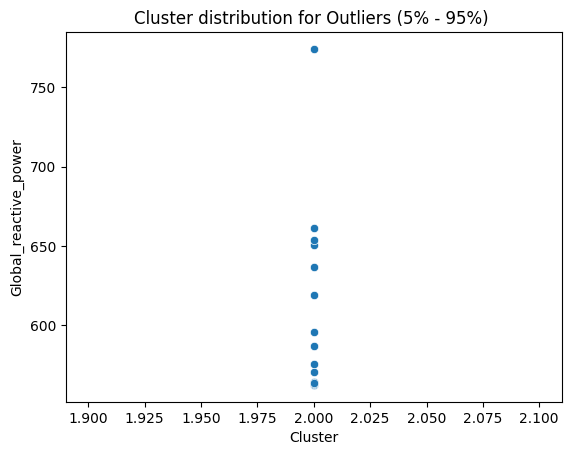

In [168]:
sns.scatterplot(data=outliers, y = 'Global_reactive_power', x = 'Cluster')
plt.title("Cluster distribution for Outliers (5% - 95%) ")

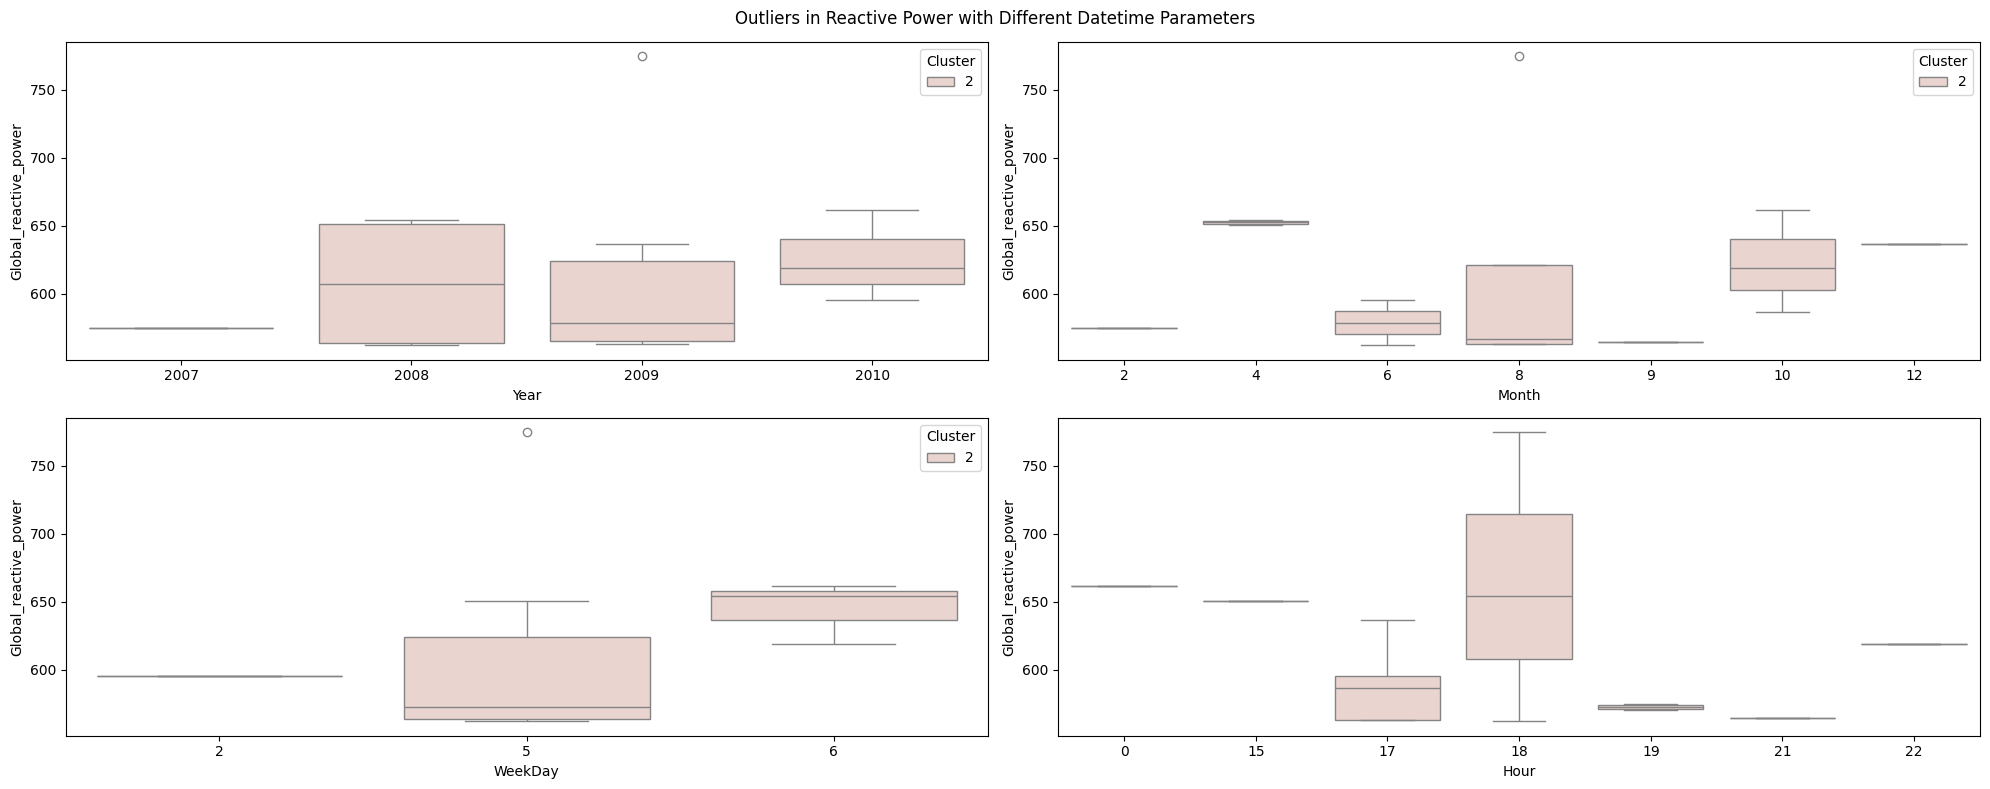

In [174]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

plt1 = sns.boxplot(data = outliers, y = 'Global_reactive_power', x = 'Year', ax=axs[0, 0], hue = 'Cluster')
plt2 = sns.boxplot(data = outliers, y = 'Global_reactive_power', x = 'Month', ax=axs[0, 1], hue = 'Cluster')
plt3 = sns.boxplot(data = outliers, y = 'Global_reactive_power', x = 'WeekDay', ax=axs[1, 0], hue = 'Cluster')
plt4 = sns.boxplot(data = outliers, y = 'Global_reactive_power', x = 'Hour' , ax=axs[1, 1], hue = 'Cluster', legend = None)
plt.suptitle("Outliers in Reactive Power with Different Datetime Parameters")
plt.tight_layout()

#### All the outliers selected with IQR derived using 5% and 95% range, seems to be in Cluster-2
 - 'Power Smart' should focus on cluster 2, as this cluster have a higher concentration of outliers in the Global Reactive Power parameter.
 - 'Power Smart' should investigate the Global Reactive Power consumption during evening hours i.e. 5PM- 7PM to identify the causes of the high values.
 - 'Power Smart' should consider implementing reactive power management strategies during weekday 5 & 6 i.e. Saturday/Sunday which shows higher Reactive Power Consumption.
 -  During the period of June-July-August, there are high no. of outliers due to the higher use of Air-Conditioning equipments during Summer. 
 